In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_rel

#Is there a correlation between suicide rates and GDP per capita or gross national income per capita?
#How does the suicide rate change over time within different age groups?
#What is the relationship between suicide rates and specific age groups or generations?
#How does the employment population ratio correlate with suicide rates?

In [2]:
df = pd.read_csv(r"C:\Users\samue\Downloads\archive (4)\suicide_rates_1990-2022.csv")
df.head()

,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
0,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
1,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
2,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
3,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
4,EU,Europe,ALB,Albania,1992,Male,15-24 years,Generation Z,5.0,3.401361,3.531073,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315


In [3]:
print(df['Sex'].value_counts())
df = df.drop(df[df['Sex'] == 'Unknown'].index)
print(df['Sex'].value_counts())
#identifying and removing unknown genders for later analysis of male vs female.

Sex
Male       58320
Female     58320
Unknown     1920
Name: count, dtype: int64
Sex
Male      58320
Female    58320
Name: count, dtype: int64


In [4]:
df.info()
#understanding the data left.

<class 'pandas.core.frame.DataFrame'>
Index: 116640 entries, 0 to 118559
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   RegionCode                    116640 non-null  object 
 1   RegionName                    116640 non-null  object 
 2   CountryCode                   116640 non-null  object 
 3   CountryName                   116640 non-null  object 
 4   Year                          116640 non-null  int64  
 5   Sex                           116640 non-null  object 
 6   AgeGroup                      116640 non-null  object 
 7   Generation                    116640 non-null  object 
 8   SuicideCount                  116176 non-null  float64
 9   CauseSpecificDeathPercentage  112709 non-null  float64
 10  DeathRatePer100K              107896 non-null  float64
 11  Population                    110720 non-null  float64
 12  GDP                           109400 non-null  fl

In [5]:
df.describe()
#basis analysis

,Year,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
count,116640.000000,116176.000000,112709.000000,107896.000000,1.107200e+05,1.094000e+05,109400.000000,1.066800e+05,105880.000000,102640.000000,105520.000000
mean,2005.689300,64.680743,3.890883,12.299791,2.362486e+07,4.856649e+11,17591.702167,4.953162e+11,22296.309029,20.439844,55.786287
std,8.762027,256.054422,7.238769,21.016170,4.427857e+07,1.665394e+12,19450.744667,1.702510e+12,19009.710839,164.241783,8.172575
min,1990.000000,0.000000,0.000000,0.000000,4.054200e+04,2.197630e+08,60.235121,2.082832e+08,780.000000,-10.630097,32.026000
25%,1999.000000,0.000000,0.000000,0.000000,2.411405e+06,1.147046e+10,3928.921739,1.153600e+10,8630.000000,1.472727,50.788000
50%,2006.000000,4.000000,0.612852,4.452366,6.664724e+06,6.169628e+10,9812.625431,5.786843e+10,16380.000000,2.996771,56.060500
75%,2013.000000,33.000000,4.435484,15.384615,2.283200e+07,2.913830e+11,25558.429050,2.908930e+11,29870.000000,6.439854,60.549000
max,2022.000000,6787.000000,100.000000,502.512563,3.320316e+08,2.331510e+13,133711.794400,2.370530e+13,152630.000000,4734.914347,87.518000


In [6]:
df.select_dtypes(exclude=np.number).columns
#gathering all columns that have no numerical values.

Index(['RegionCode', 'RegionName', 'CountryCode', 'CountryName', 'Sex',
       'AgeGroup', 'Generation'],
      dtype='object')

In [7]:
df.select_dtypes(include=np.number).columns
#this is giving us all the columns that have numerical values

Index(['Year', 'SuicideCount', 'CauseSpecificDeathPercentage',
       'DeathRatePer100K', 'Population', 'GDP', 'GDPPerCapita',
       'GrossNationalIncome', 'GNIPerCapita', 'InflationRate',
       'EmploymentPopulationRatio'],
      dtype='object')

In [8]:
df.describe(exclude=np.number).T
#transposed dataframe to get numerical values from none numerical units.

,count,unique,top,freq
RegionCode,116640,6,EU,45120
RegionName,116640,6,Europe,45120
CountryCode,116640,117,CAN,1320
CountryName,116640,117,Canada,1320
Sex,116640,2,Male,58320
AgeGroup,116640,7,0-14 years,23328
Generation,116640,7,Generation Alpha,23328


In [9]:
duplicate = df.duplicated(keep=False)
df[duplicate].tail(1)
#will be keeping these duplicates as they represent seperate entities and aren't simply duplicated values.

,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
118541,NAC,North America and the Caribbean,USA,United States of America,2021,Female,0-14 years,Generation Alpha,0.0,0.0,0.0,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946


In [10]:
suicide_counts_per_year = df.groupby('Year')['SuicideCount'].sum()
print(suicide_counts_per_year.head())
#summerising suicides per year for the dataset.

Year
1990    207445.0
1991    207584.0
1992    221963.0
1993    232369.0
1994    242419.0
Name: SuicideCount, dtype: float64


In [11]:
years_drate = df.groupby('Year')['DeathRatePer100K'].sum()
years_drate.head()
#grouping each year and calculating how many deaths per 100k are suicides.

Year
1990    44935.674479
1991    44139.373286
1992    45044.416485
1993    46270.901763
1994    47556.535219
Name: DeathRatePer100K, dtype: float64

In [12]:
suicides_per_year = df.groupby('Year')['SuicideCount'].sum().reset_index() 
years_drate = df.groupby('Year')['DeathRatePer100K'].sum().reset_index()

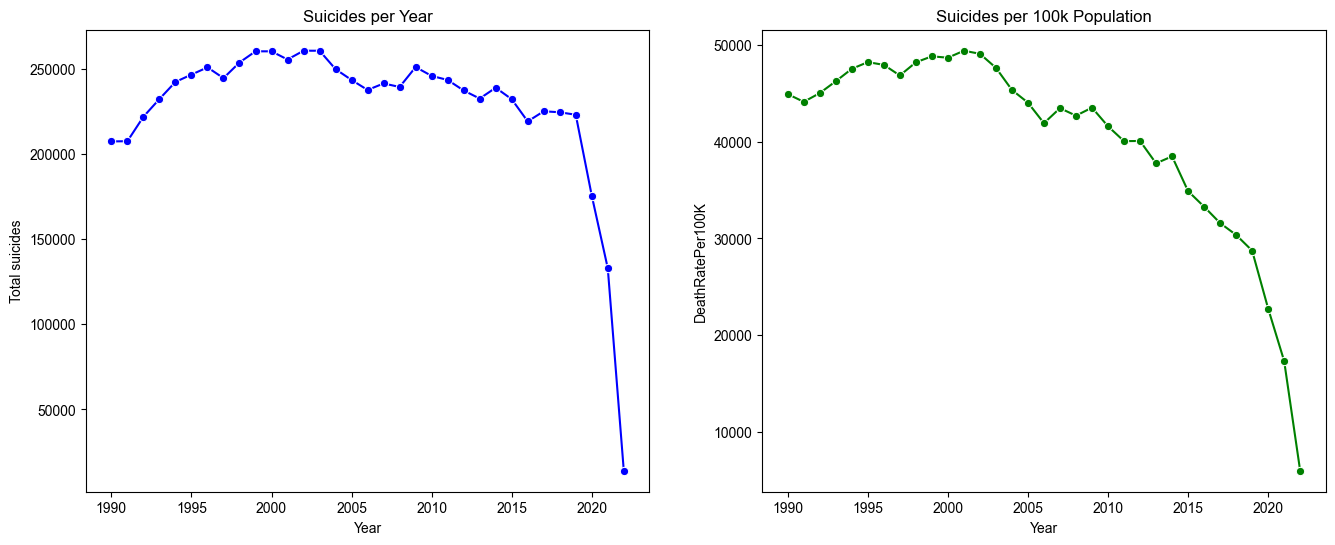

'Showing us how many suicides they are yearly and their relationship to the overall death rate'

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
sns.set_style('whitegrid')

sns.lineplot(x='Year', y='SuicideCount', 
             data=suicides_per_year, ax=ax[0],
            color='blue', marker='o')
ax[0].set_title('Suicides per Year')
ax[0].set_ylabel('Total suicides')

sns.lineplot(x='Year', y='DeathRatePer100K', 
             data=years_drate, ax=ax[1],
             color='green', marker='o')
ax[1].set_title('Suicides per 100k Population')
#plt.text(2005, 100000, 'Fire', fontsize=12)
plt.show()

'''Showing us how many suicides they are yearly and their relationship to the overall death rate'''

'Identifying differences in suicide rates for each gender and their relationship to overall death rates\n'

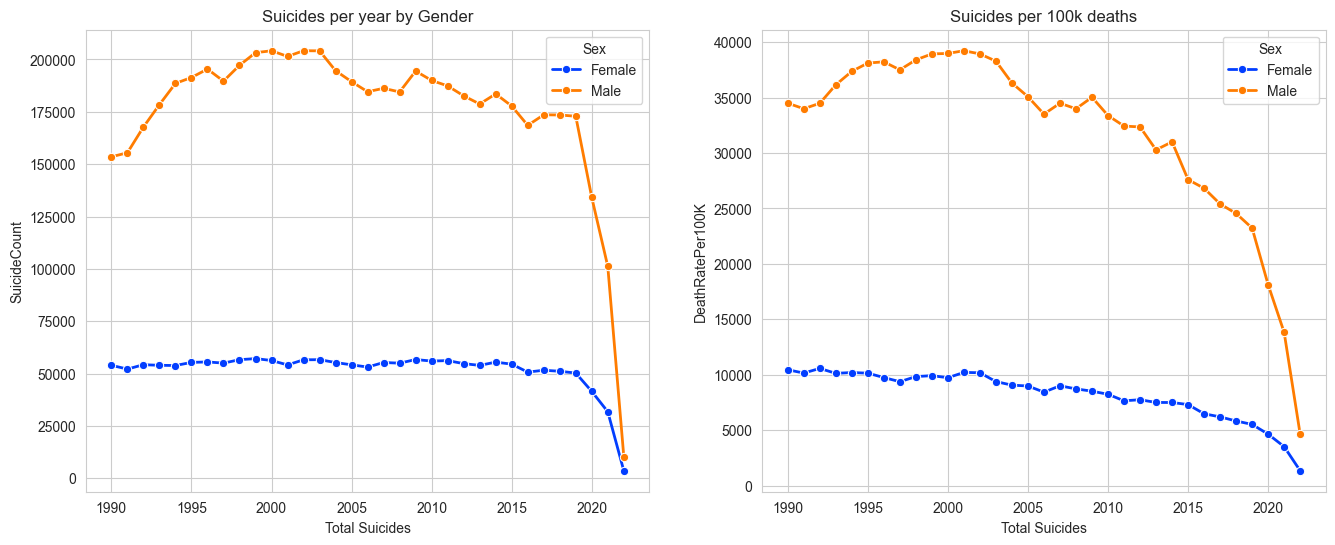

In [14]:
s_by_sex = df.groupby(['Year', 'Sex']).agg({'SuicideCount': 'sum', 'DeathRatePer100K': 'sum'}).reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
sns.set_style('whitegrid')



palette = 'bright'
sns.lineplot(x='Year', y='SuicideCount', 
             data=s_by_sex,  hue='Sex',
             ax=ax[0], palette=palette,
             marker='o', linewidth=2) 
ax[0].set_title('Suicides per year by Gender')
ax[0].set_xlabel('Total Suicides')

palette = 'bright'
sns.lineplot(x='Year', y='DeathRatePer100K', 
             data=s_by_sex,  hue='Sex',
             ax=ax[1], palette=palette,
             marker='o', linewidth=2) 
ax[1].set_title('Suicides per 100k deaths')
ax[1].set_xlabel('Total Suicides')

 
'''Identifying differences in suicide rates for each gender and their relationship to overall death rates
'''

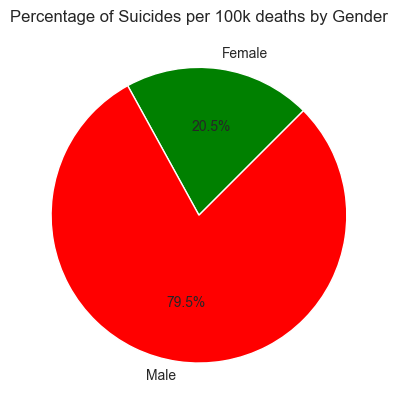

'Showing percentages of male vs female suicides per 100k deaths. This identifies a difference that can be further explored'

In [15]:
Gender_by_death_rate = df.groupby('Sex')['DeathRatePer100K'].sum()
Sex = ['Female', 'Male']
colors = ['Green', 'Red']


plt.pie(Gender_by_death_rate, labels=Sex, 
        autopct='%.1f%%', colors=colors,
       startangle=45)
plt.title('Percentage of Suicides per 100k deaths by Gender')

plt.show()
'''Showing percentages of male vs female suicides per 100k deaths. This identifies a difference that can be further explored'''

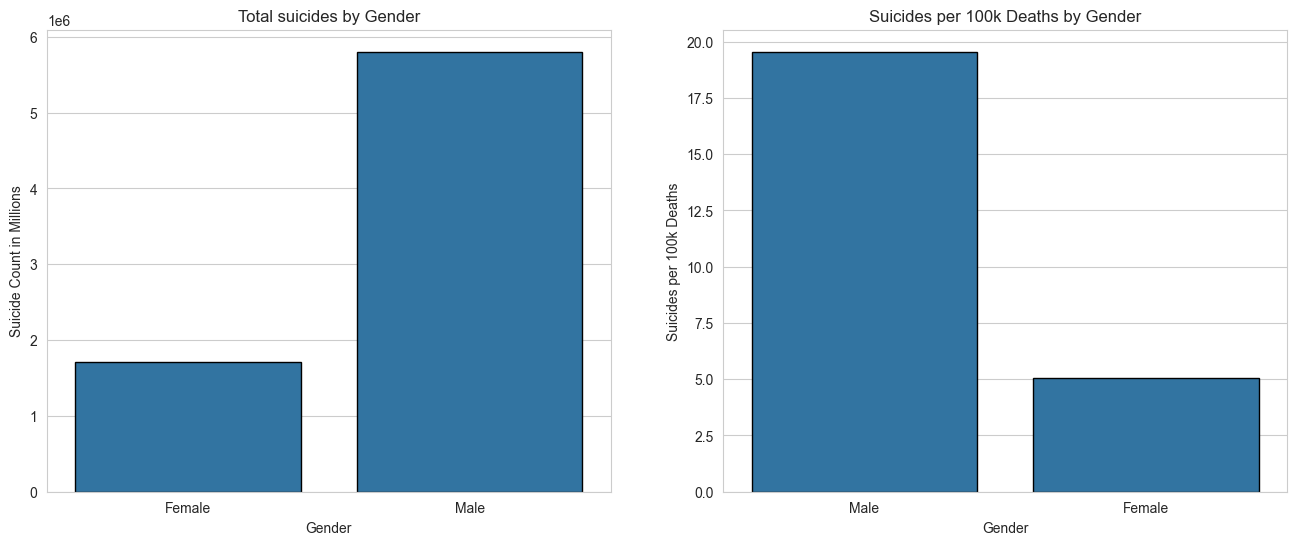

' Proportionally, within each 100k deaths, Males are still showing higher rates of suicide compared to women'

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

data_g = df.groupby('Sex').agg({'SuicideCount': 'sum', 'DeathRatePer100K': 'sum'}).reset_index()
sns.barplot(x='Sex',
            y='SuicideCount',
            data=data_g,
            errorbar=None,
            edgecolor='black', ax=ax[0])
ax[0].set_title('Total suicides by Gender')
ax[0].set_ylabel('Suicide Count in Millions')
ax[0].set_xlabel('Gender')

sns.barplot(x='Sex',
            y='DeathRatePer100K',
            data=df,
            errorbar=None,
            edgecolor='black', ax=ax[1])

ax[1].set_title('Suicides per 100k Deaths by Gender')
ax[1].set_ylabel('Suicides per 100k Deaths')
ax[1].set_xlabel('Gender')

plt.show()
''' Showing a vast difference between the overall suicides of men compared to woman. Both in total but also '''
''' Proportionally, within each 100k deaths, Males are still showing higher rates of suicide compared to women'''

Text(0, 0.5, 'Suicides per 100k')

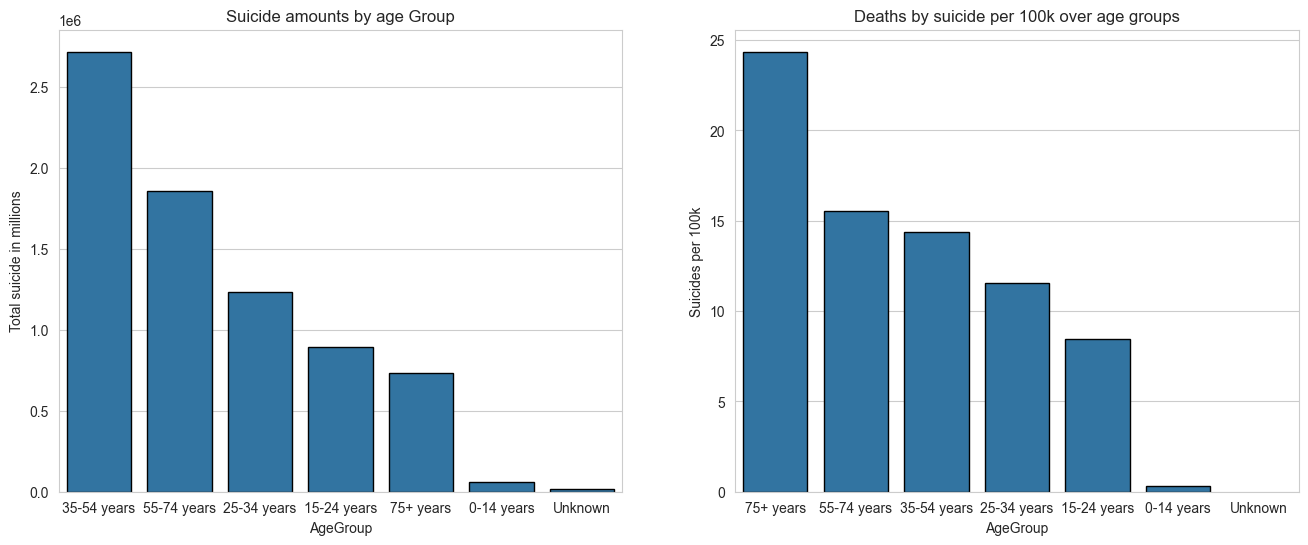

In [17]:
suicides_by_generation = df.groupby('AgeGroup')['SuicideCount'].sum().sort_values(ascending=False).reset_index()
suicide_rate = df.groupby('AgeGroup')['DeathRatePer100K'].mean().sort_values(ascending=False).reset_index()

fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
sns.set_style('whitegrid')

sns.barplot(x='AgeGroup', y='SuicideCount', 
            data=suicides_by_generation, ax=ax[0], 
            edgecolor='black')
ax[0].set_title('Suicide amounts by age Group')
ax[0].set_ylabel('Total suicide in millions')


sns.barplot(x='AgeGroup', y='DeathRatePer100K', 
            data=suicide_rate, ax=ax[1],
           edgecolor='black', errorbar=None)
ax[1].set_title('Deaths by suicide per 100k over age groups')
ax[1].set_ylabel('Suicides per 100k')


#What is the relationship between suicide rates and specific age groups or generations?

'committing than females.'

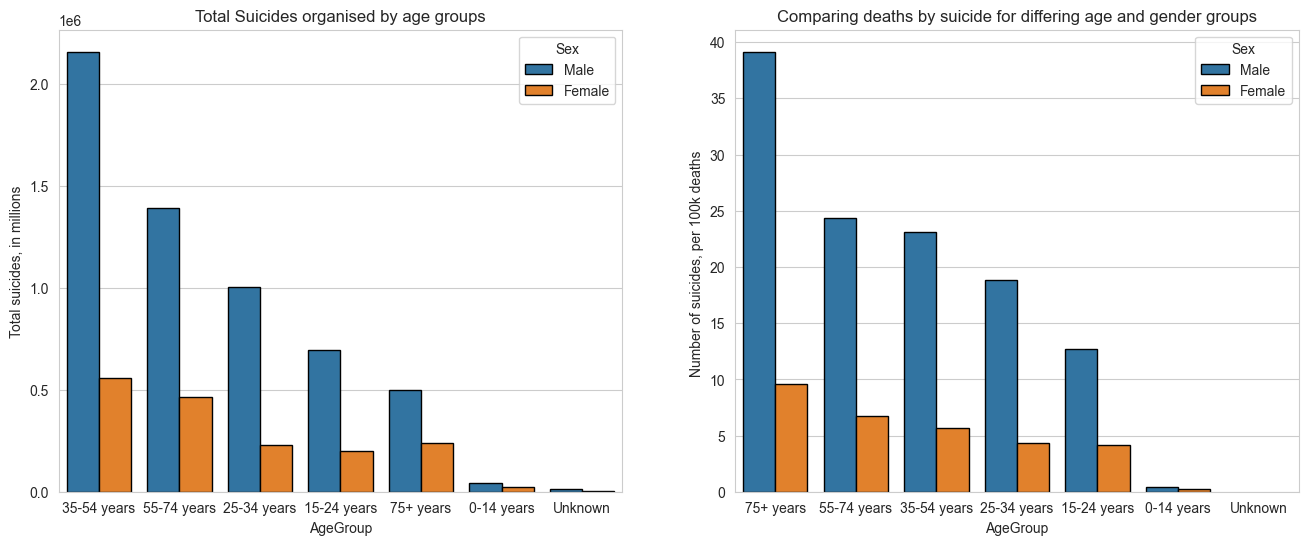

In [18]:
suicides_by_generation = df.groupby(['AgeGroup', 'Sex'])['SuicideCount'].sum().sort_values(ascending=False).reset_index()
suicide_rate = df.groupby(['AgeGroup', 'Sex'])['DeathRatePer100K'].mean().sort_values(ascending=False).reset_index()

fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

sns.barplot(x='AgeGroup', y='SuicideCount', 
data=suicides_by_generation, ax=ax[0], hue='Sex', 
edgecolor='black', errorbar=None)
ax[0].set_title('Total Suicides organised by age groups')
ax[0].set_ylabel('Total suicides, in millions')
#should note the dataset goes 1990-2020 so 30 years worth.

sns.barplot(x='AgeGroup', y='DeathRatePer100K', 
data=suicide_rate, ax=ax[1], hue='Sex',
edgecolor='black', errorbar=None)
ax[1].set_title('Comparing deaths by suicide for differing age and gender groups')
ax[1].set_ylabel('Number of suicides, per 100k deaths ')

'''Highlighting suicide numbers per age groups. Showing that overall, 35-54 year olds are most likely to commit'''
''' suicide but also that men are the most likely to do so. This does slightly change when looking into rates per'''
''' 100k deaths. Identifying 75+ as the most likely to commit suicide but similarly, males are more frequently'''
'''committing than females.'''

' it highlights that the silent generation, followed by baby boomers are more likely to commit suicide.'

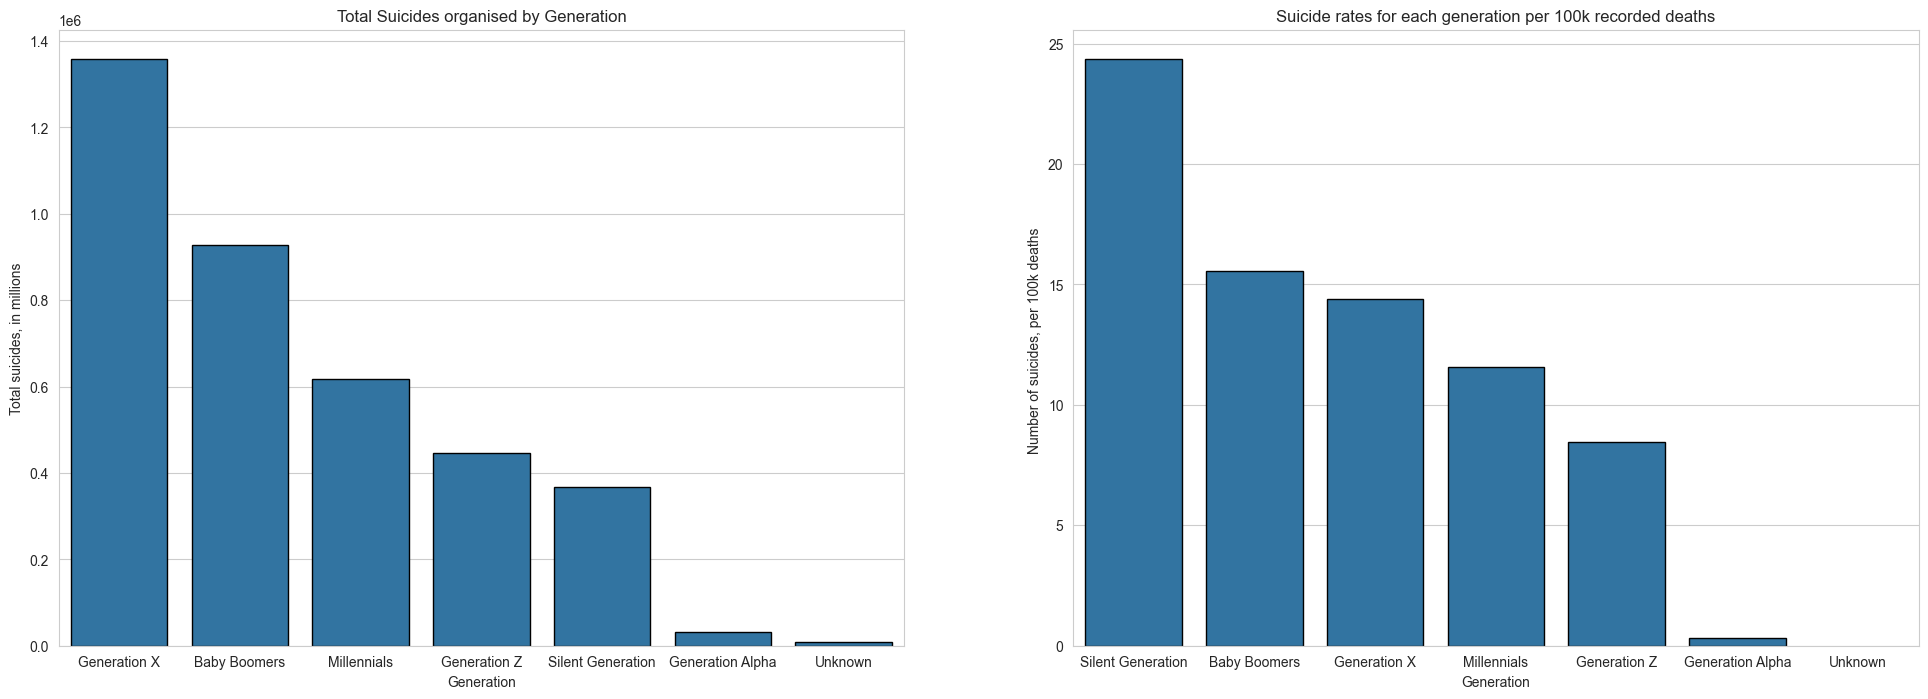

In [19]:
'''What is the relationship between suicide rates and generations?'''

suicides_by_generation = df.groupby(['Generation', 'Sex'])['SuicideCount'].sum().sort_values(ascending=False).reset_index()
suicide_rate = df.groupby(['Generation', 'Sex'])['DeathRatePer100K'].mean().sort_values(ascending=False).reset_index()

fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(24,8))
          
sns.barplot(x='Generation', y='SuicideCount', 
data=suicides_by_generation, ax=ax[0], 
edgecolor='black', errorbar=None
           )
ax[0].set_title('Total Suicides organised by Generation')
ax[0].set_ylabel('Total suicides, in millions')
#should note the dataset goes 1990-2020 so 30 years worth.

sns.barplot(x='Generation', y='DeathRatePer100K', 
data=suicide_rate, ax=ax[1],
edgecolor='black', errorbar=None
           )
ax[1].set_title('Suicide rates for each generation per 100k recorded deaths')
ax[1].set_ylabel('Number of suicides, per 100k deaths ')

''' Bar charts to show the total suicides across each generation and suicide rates per generator in a 100k sample.'''
''' These indicate that, overall, generation x, followed by baby boomers have the highest amount of suicide. However, if you look at per 100k deaths, '''
''' it highlights that the silent generation, followed by baby boomers are more likely to commit suicide.'''


In [20]:
df.select_dtypes(include=np.number).columns
n_corr = ['DeathRatePer100K', 'GDP', 'GDPPerCapita', 'GNIPerCapita', 'InflationRate', 'EmploymentPopulationRatio', 'GrossNationalIncome']

data = df[n_corr].corr() # this is the data i want to use to analyse vs suicide numbers. Deathper100k.

data



,DeathRatePer100K,GDP,GDPPerCapita,GNIPerCapita,InflationRate,EmploymentPopulationRatio,GrossNationalIncome
DeathRatePer100K,1.000000,0.023894,0.006279,-0.025042,0.048412,-0.070449,0.027085
GDP,0.023894,1.000000,0.295222,0.244585,-0.022518,0.058022,0.999320
GDPPerCapita,0.006279,0.295222,1.000000,0.858277,-0.080694,0.292477,0.292714
GNIPerCapita,-0.025042,0.244585,0.858277,1.000000,-0.088000,0.375252,0.244523
InflationRate,0.048412,-0.022518,-0.080694,-0.088000,1.000000,0.016442,-0.022571
EmploymentPopulationRatio,-0.070449,0.058022,0.292477,0.375252,0.016442,1.000000,0.058630
GrossNationalIncome,0.027085,0.999320,0.292714,0.244523,-0.022571,0.058630,1.000000


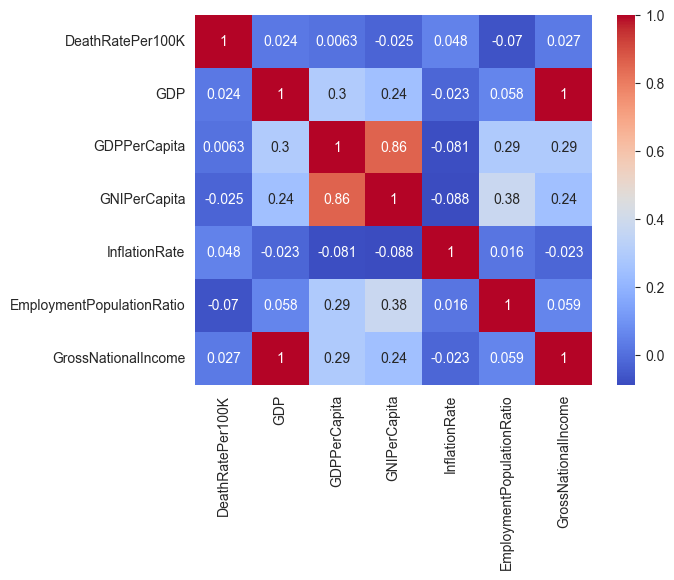

In [21]:
head = sns.heatmap(data[n_corr], cmap='coolwarm', annot=True)
plt.show()

In [22]:
'''Questions posed at the beginning'''
'''Is there a correlation between suicide rates and GDP per capita?
-There is a correlation of 0.0063 between suicide rates per 100k and the GDP per capita. As this is very close to 0, the correlation is very weak, 
if at all there.'''

'Is there a correlation between suicide rates and GDP per capita?\n-There is a correlation of 0.0063 between suicide rates per 100k and the GDP per capita. As this is very close to 0, the correlation is very weak, \nif at all there.'

'\n[0] shows consistant suicide rages for agegroups, other than in the 35-54 where they peak more rapidly than other groups. However, the downward\nincline at the end may be representative of incomplete data. \n\n[1] shows a decrease in suicides per 100k in all age groups until around 2020 where there is a slight increase.\nCould add in gender to see if the trend continues but overall it does show that while the suicide total per year is somewhere consistant\nacross age groups. The death by suicide in general population is decreasing, suggesting stagnation of suicide rates while population increases across \nall age groups.\n'

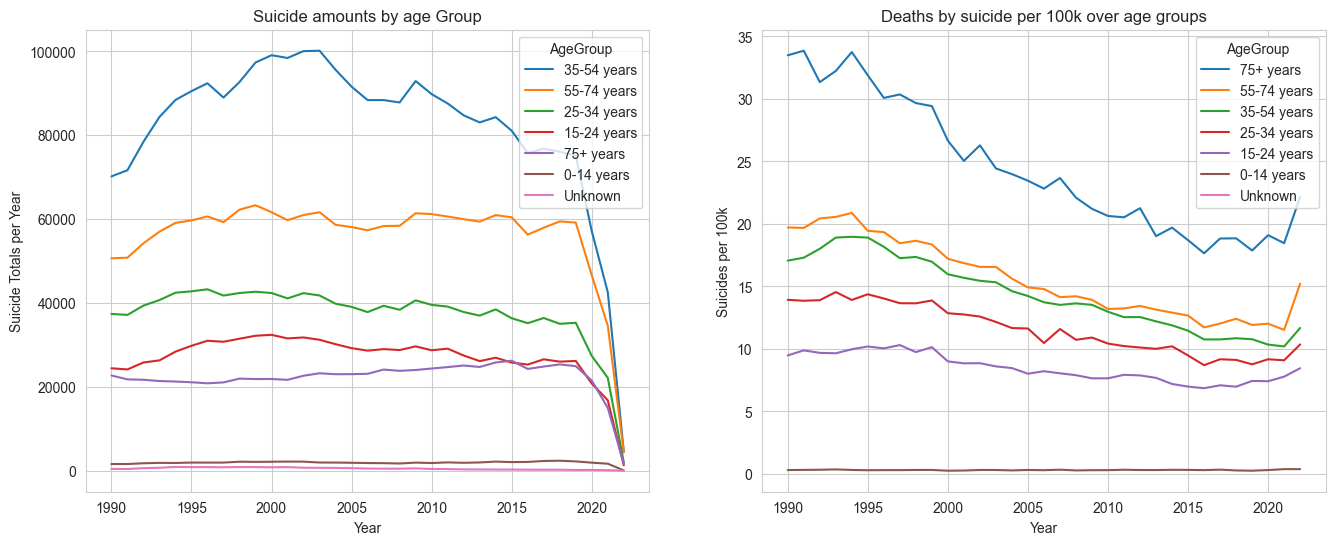

In [23]:
#How does the suicide rate change over time within different age groups?
suicides_by_generation = df.groupby(['AgeGroup', 'Year'])['SuicideCount'].sum().sort_values(ascending=False).reset_index()
suicide_rate = df.groupby(['AgeGroup', 'Year'])['DeathRatePer100K'].mean().sort_values(ascending=False).reset_index()

fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

sns.lineplot(x='Year', y='SuicideCount', 
            data=suicides_by_generation, 
            ax=ax[0], 
            hue='AgeGroup')
ax[0].set_title('Suicide amounts by age Group')
ax[0].set_ylabel('Suicide Totals per Year')


sns.lineplot(x='Year', y='DeathRatePer100K', 
            data=suicide_rate, ax=ax[1],
            hue='AgeGroup')
ax[1].set_title('Deaths by suicide per 100k over age groups')
ax[1].set_ylabel('Suicides per 100k')

'''
[0] shows consistant suicide rages for agegroups, other than in the 35-54 where they peak more rapidly than other groups. However, the downward
incline at the end may be representative of incomplete data. 

[1] shows a decrease in suicides per 100k in all age groups until around 2020 where there is a slight increase.
Could add in gender to see if the trend continues but overall it does show that while the suicide total per year is somewhere consistant
across age groups. The death by suicide in general population is decreasing, suggesting stagnation of suicide rates while population increases across 
all age groups.
'''

Text(0, 0.5, 'Suicides per 100k deaths')

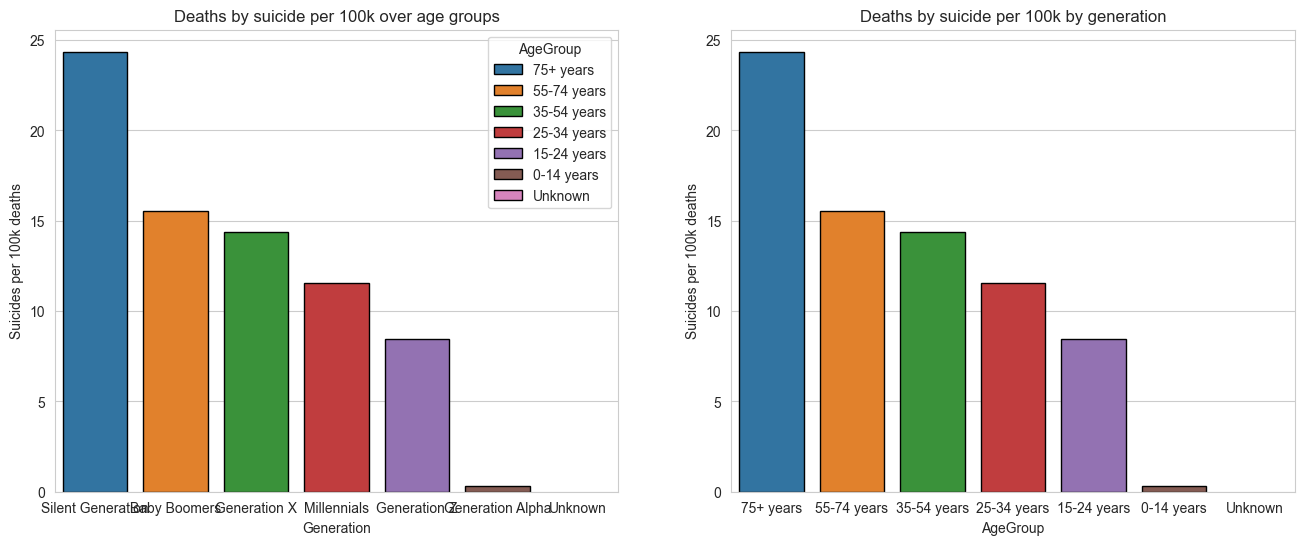

In [24]:

#What is the relationship between suicide rates and specific age groups or generations?
suicides_by_generation = df.groupby('AgeGroup')['SuicideCount'].sum().sort_values(ascending=False).reset_index()
suicide_rate = df.groupby(['Generation', 'AgeGroup'])['DeathRatePer100K'].mean().sort_values(ascending=False).reset_index()

fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

sns.barplot(x='Generation', y='DeathRatePer100K', 
            data=suicide_rate, ax=ax[0], 
            edgecolor='black', hue='AgeGroup')
ax[0].set_title('Deaths by suicide per 100k over age groups')
ax[0].set_ylabel('Suicides per 100k deaths')


sns.barplot(x='AgeGroup', y='DeathRatePer100K', 
            data=suicide_rate, ax=ax[1],
           edgecolor='black', errorbar=None, hue='AgeGroup')
ax[1].set_title('Deaths by suicide per 100k by generation')
ax[1].set_ylabel('Suicides per 100k deaths')

#Agegroup directly equals the generation so these graphs are identical.
#The trend being that higher age groups have a higher number of suicides /100k deaths than younger age groups. 

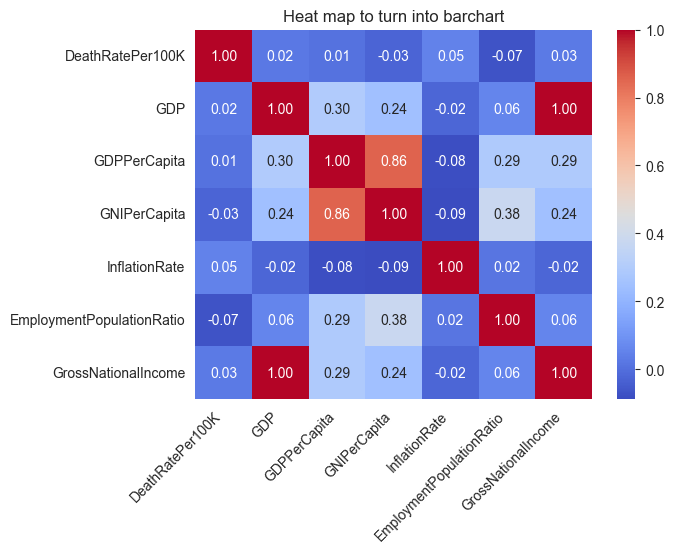

In [25]:
#How does the employment population ratio correlate with suicide rates?
sns.heatmap(data,
            cmap='coolwarm', #colour scheme.
            annot=True, #this lets it have the numbers.
            fmt='.2f') #dp I want.
plt.title('Heat map to turn into barchart', fontsize=12) #title and size.
plt.xticks(rotation=45, ha='right') #x axis title were directly down before. this turns them 45 degree to the right.

plt.show()

#the heat map shows a -0.07 correlation between suicides per 100k and employmentpopulation ratio. Suggestings a weak negative correlation.
#Meaning that as that ratio of employement increases, suicide decreases, slightly. 
#i want to change this to a barchart correlation

C:\Users\samue\AppData\Local\Temp\ipykernel_12360\3109851621.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


" Weak to no relationship between Gross national, GDP, GDP per capita, GNI Per Capita as they sit around 0.\nOr slightly above/below.\nTwo factors show a stronger relationship than other factors, however, weak in terms of correlation.\nInflation rate is around 0.05 suggesting, if at all, a weak relationship between higher inflation rates \nand suicide rates.\nThe strongest negative correlation comes ata Employment ratio vs Suicide Rates. Suggesting a weak relationship\nbetween higher employment rates and lower suicide rates and it's converse. \n\nThe direction of these correlations, while expected are too low to identify any relationship and therefore it\ncannot be concluded that there are any strong or negative relationships between the factors listed below and\ntheir effect on suicide rates.\n\n"

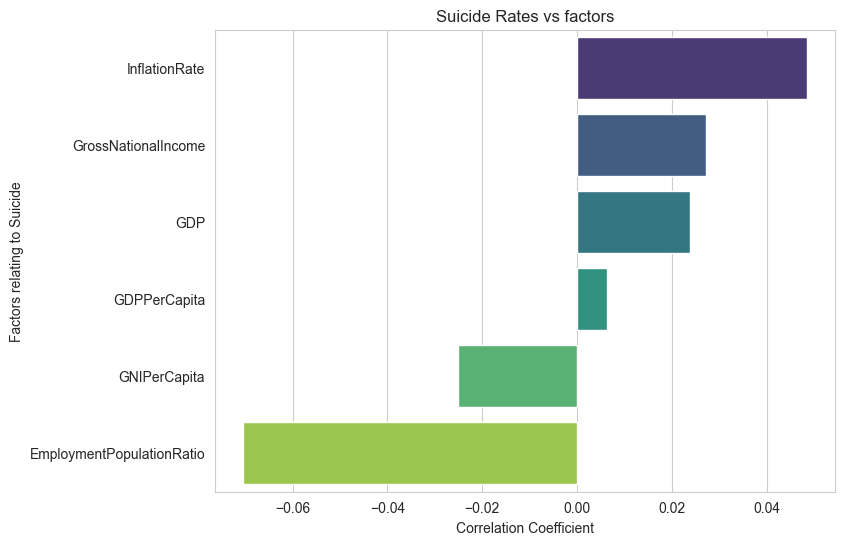

In [26]:
# data = my heatmap data.
#i want to correlate these data vs the suicide rate (death per 100k)
bcorr = data['DeathRatePer100K'].sort_values(ascending=False)[1:] #this means it should ignore itself. by going from
#the 2nd value onwards.
plt.figure(figsize=(8, 6))  # Adjust figure size
sns.barplot(
    x=bcorr.values, 
    y=bcorr.index, 
    palette='viridis'
)
#we need it edit this to get rid of the deathrate so run from [1:] and make the bar easier to read. 
#this is done in the bcorr bit where I exclude the deathrate by telling it to run from 1 on.
plt.title('Suicide Rates vs factors', fontsize=12)
plt.xlabel('Correlation Coefficient', fontsize=10)
plt.ylabel('Factors relating to Suicide', fontsize=10)

#understanding the data.
''' Weak to no relationship between Gross national, GDP, GDP per capita, GNI Per Capita as they sit around 0.
Or slightly above/below.
Two factors show a stronger relationship than other factors, however, weak in terms of correlation.
Inflation rate is around 0.05 suggesting, if at all, a weak relationship between higher inflation rates 
and suicide rates.
The strongest negative correlation comes ata Employment ratio vs Suicide Rates. Suggesting a weak relationship
between higher employment rates and lower suicide rates and it's converse. 

The direction of these correlations, while expected are too low to identify any relationship and therefore it
cannot be concluded that there are any strong or negative relationships between the factors listed below and
their effect on suicide rates.

'''